# Fundamentos de risco e retornos

In [37]:
# Bibliiotecas importadas
import numpy as np
import pandas as pd 
import yfinance as yf
%matplotlib inline

## Retorno Simples ($R_{t, t+1}$)

$$R_{t, t+1} = \dfrac{P_{t+1} - P_t}{P_t}$$  

ou alternativamente  

$$R_{t, t+1} = \dfrac{P_{t+1}}{P_t} - 1$$

Exemplo:

In [38]:
empresas = {
    'Banco do Brasil S.A.': 'BBAS3.SA',
    'Banco Bradesco S.A.': 'BBDC3.SA',
    'Itaúsa - Investimentos Itaú SA': 'ITSA4.SA'
}

In [39]:
tickers = list(empresas.values())
prices = yf.download(tickers=tickers, start='2019-12-31', end='2020-12-31', progress=False)['Adj Close']
prices.head()

,BBAS3.SA,BBDC3.SA,ITSA4.SA
Date,,,
2020-01-02,48.002701,27.186684,12.605558
2020-01-03,47.922401,26.762447,12.421086
2020-01-06,47.288906,26.608953,12.394732
2020-01-07,46.932011,26.156134,12.227833
2020-01-08,46.503731,25.757042,12.043357


In [40]:
prices.shape

(248, 3)

Cálculo do Retorno Simples para cada ação.

In [41]:
returns = prices.pct_change()

returns.head()

,BBAS3.SA,BBDC3.SA,ITSA4.SA
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.001673,-0.015605,-0.014634
2020-01-06,-0.013219,-0.005735,-0.002122
2020-01-07,-0.007547,-0.017018,-0.013465
2020-01-08,-0.009126,-0.015258,-0.015087


Visualização Gráfica da série temporal de preços

<AxesSubplot:xlabel='Date'>

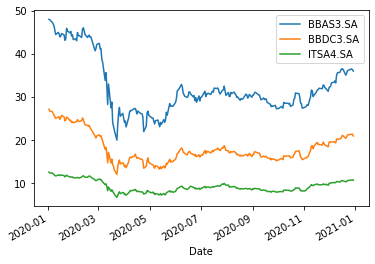

In [42]:
prices.plot()

Visualização gráfica dos retornos mensais

In [43]:
returns_montly = returns.resample('M').mean()

returns_montly.index = returns_montly.index.to_period('M')

returns_montly

,BBAS3.SA,BBDC3.SA,ITSA4.SA
Date,,,
2020-01,-0.004717,-0.005666,-0.005120
2020-02,-0.001132,-0.007282,-0.002681
2020-03,-0.018780,-0.013786,-0.012421
2020-04,0.002588,0.002647,0.001917
2020-05,0.004632,0.001372,-0.000284
2020-06,0.002427,0.003411,0.004214
2020-07,0.002119,0.004240,0.004851
2020-08,-0.000538,-0.003868,-0.005518
2020-09,-0.004387,-0.002387,-0.003065


<AxesSubplot:xlabel='Date'>

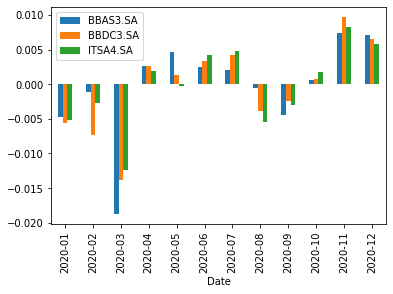

In [44]:
returns_montly.plot.bar()

Volatilidade dos ativos

Corresponde ao Desvio Padrão dos retornos

In [45]:
volatility = returns.std()
volatility

BBAS3.SA    0.039122
BBDC3.SA    0.035640
ITSA4.SA    0.027956
dtype: float64

Retorno médio de cada ação

In [46]:
returns.mean()

BBAS3.SA   -0.000395
BBDC3.SA   -0.000417
ITSA4.SA   -0.000269
dtype: float64

Retorno anual

In [47]:
(returns + 1).prod() - 1

BBAS3.SA   -0.249744
BBDC3.SA   -0.228378
ITSA4.SA   -0.150698
dtype: float64

## Segundo Exemplo

In [48]:
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                        header=0, index_col=0, parse_dates=True, na_values=-99.99
                      )
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [49]:
columns = ['Lo 10', 'Hi 10']

returns = returns[columns]

returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [50]:
returns = returns / 100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [51]:
returns.columns = ['SmallCaps', 'LargeCaps']
returns.head()

,SmallCaps,LargeCaps
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

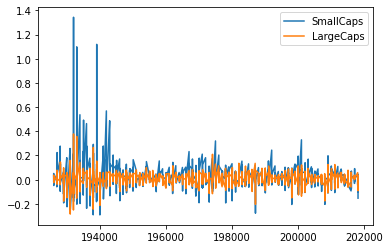

In [52]:
returns.plot.line()

Volatilidade

In [53]:
volatility = returns.std()
volatility

SmallCaps    0.106288
LargeCaps    0.053900
dtype: float64

In [54]:
annualized_vol = volatility * np.sqrt(12)
annualized_vol

SmallCaps    0.368193
LargeCaps    0.186716
dtype: float64

Retorno mensal

In [55]:
n_months = returns.shape[0]

return_per_month = ((1 + returns).prod() ** (1 / n_months)) - 1

return_per_month

SmallCaps    0.012986
LargeCaps    0.007423
dtype: float64

In [56]:
annualized_return = (return_per_month + 1) ** 12 - 1

annualized_return

SmallCaps    0.167463
LargeCaps    0.092810
dtype: float64

In [57]:
annualized_return = ((1 + returns).prod() ** (12 / n_months)) - 1

annualized_return

SmallCaps    0.167463
LargeCaps    0.092810
dtype: float64

In [58]:
risk = annualized_return / annualized_vol

risk

SmallCaps    0.454825
LargeCaps    0.497063
dtype: float64

In [59]:
riskfree_rate = 0.03

excess_return = annualized_return - riskfree_rate

sharpe_ratio = excess_return / annualized_vol

sharpe_ratio

SmallCaps    0.373346
LargeCaps    0.336392
dtype: float64

## Máximo _Drawdown_ (Máximo Rebaixamento)

> É a perda máxima experimentada a partir de um pico anterior para um vale subseguente. 

> O _Dradown_ é uma medida do risco de queda. 

> É a perda teórica que você teria sofrido se tivesse investido no pico e vendido na baixa.



**Etapas para o cálculo do Máximo _Drawdown_:**

1. Converter a série de retornos para o que é chamado de **índice de riqueza**.
2. Calcular os picos a cada ponto de tempo.
3. Plotar os _drawdowns_ ao longo do tempo.

**Cálcudo dos Rebaixamentos (Drawdowns)**

In [60]:
# Bibliotecas necessárias
import pandas as pd

**Fonte:** Retornos mensais com base no capital de mercado ou com base no tamanho para _Small Caps_ e _Large Caps_.

In [61]:
# importação do dataset
me_m = pd.read_csv(
    "data/Portfolios_Formed_on_ME_monthly_EW.csv",
    header=0,
    index_col=0,
    parse_dates=True,
    na_values=-99.99
)

me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


Faremos uso apenas dos ativos referentes ao decil superior (Hi 10) e ao decil inferior (Lo 10):

In [62]:
# Seleção das colunas de interesse
rets = me_m[['Lo 10', 'Hi 10']]

# Renomear colunas
rets.columns = ['SmallCap', 'LargeCap']

# Converter os retornos
rets = rets / 100

In [68]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [70]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

Vemos que a coluna _index_ está no formato 'int64' quando deveria estar no formato de 'data e hora'. Para resolver esse problema, façamos a seguinte conversão:

In [71]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')

In [72]:
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


Vemos que o formato de dados foi convertido para 'data e hora'. Entretanto, por padrão, foi atribuído o primeiro dia de cada mês. Isso é indesejado na medida em que os retornos referem-se ao mês como um todo. Para esse novo problema, façamos:

In [73]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


Visualizamos novamente o gráfico de retornos:

<AxesSubplot:>

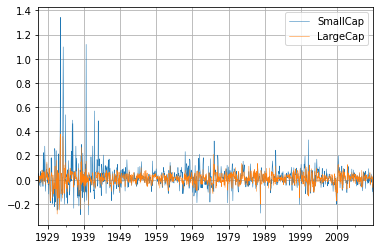

In [79]:
rets.plot.line(lw=.5, grid=True)

Podemos ver informações gerais desse dataframe:

In [80]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


**Procedimento**

1. Calcular o índice de riqueza

In [81]:
wealth_index = 1000. * (1 + rets['LargeCap']).cumprod()

wealth_index.head()


1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

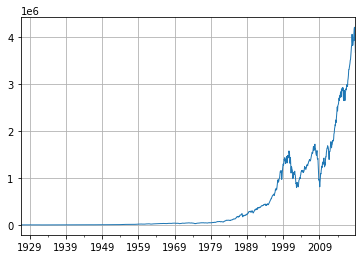

In [84]:
wealth_index.plot.line(lw=1, grid=True)

2. Calcular picos anteriores

In [86]:
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

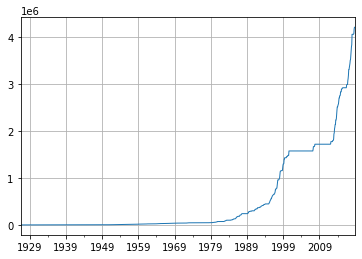

In [88]:
previous_peaks.plot(lw=1, grid=True)

3. Calcular o _drawdown_ - que é o valor da riqueza como porcentagem do pico anterior

<AxesSubplot:>

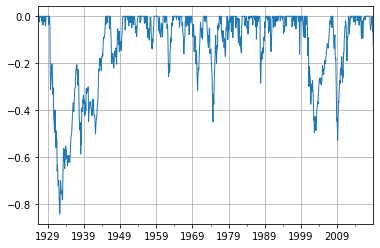

In [89]:
drawdown = (wealth_index - previous_peaks) / previous_peaks

drawdown.plot(lw=1, grid=True)

In [90]:
max_drawdown = drawdown.min()

max_drawdown

-0.8400375277943123

O máximo _drawdown_ e o momento de sua ocorrência:

In [110]:
print(f"O máximo drawdown de todo o período analizado ocorreu no mês {drawdown.idxmin().strftime('%m de %Y')} e  foi de {100 * drawdown.min():.2f}%.")

O máximo drawdown de todo o período analizado ocorreu no mês 05 de 1932 e  foi de -84.00%.


In [120]:
dd_value = drawdown["1975":].min()
dd_time = drawdown["1975":].idxmin().strftime('%m de %Y')

print(f"O máximo drawdown desde 1975 ocorreu no mês {dd_time} e  foi de {dd_value:.2f}%.")

O máximo drawdown desde 1975 ocorreu no mês 02 de 2009 e  foi de -0.53%.


In [115]:
drawdown["1975":].idxmin().strftime('%m de %Y')

'02 de 2009'

In [130]:
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns a DataFrame that contains:
        - the  wealth index
        - the previous peaks
        - percent drawdowns
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        'Wealth'    : wealth_index,
        'Peaks'     : previous_peaks,
        'Drawdown' : drawdowns
    })

In [131]:
largecap_drawdown = drawdown(rets['LargeCap'])

largecap_drawdown.head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<AxesSubplot:>

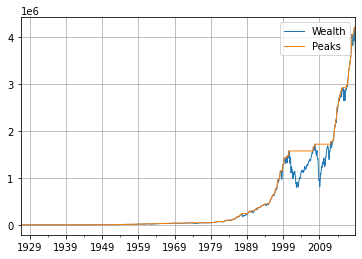

In [132]:
largecap_drawdown[['Wealth', 'Peaks']].plot(lw=1, grid=True)

<AxesSubplot:>

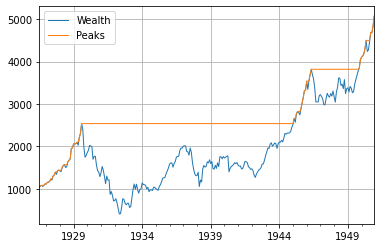

In [133]:
largecap_drawdown[:"1950"][['Wealth', 'Peaks']].plot(lw=1, grid=True)

In [134]:
smallcap_drawdown = drawdown(rets['SmallCap'])

smallcap_drawdown.head()

,Wealth,Peaks,Drawdown
1926-07,985.500000,985.500000,0.000000
1926-08,1035.957600,1035.957600,0.000000
1926-09,1045.592006,1045.592006,0.000000
1926-10,994.985353,1045.592006,-0.048400
1926-11,987.224467,1045.592006,-0.055822


In [141]:
smallcap_drawdown_value = smallcap_drawdown['Drawdown'].min()
smallcap_drawdown_strtime = smallcap_drawdown['Drawdown'].idxmin().strftime('%m de %Y')

print(f"Para as SmallCaps, o máximo drawdown de todo o período foi de {100 * smallcap_drawdown_value:.2f}% e ocorreu eno mês {smallcap_drawdown_strtime}.")

Para as SmallCaps, o máximo drawdown de todo o período foi de -83.30% e ocorreu eno mês 05 de 1932.


In [142]:
smallcap_drawdown_value_75 = smallcap_drawdown["1975":]['Drawdown'].min()
smallcap_drawdown_strtime_75 = smallcap_drawdown["1975":]['Drawdown'].idxmin().strftime('%m de %Y')

print(f"Para as SmallCaps, o máximo drawdown desde 1975 foi de {100 * smallcap_drawdown_value_75:.2f}% e ocorreu eno mês {smallcap_drawdown_strtime_75}.")

Para as SmallCaps, o máximo drawdown desde 1975 foi de -63.12% e ocorreu eno mês 02 de 2009.


**Exemplo Brasileiro**

In [143]:
import yfinance as yf 

In [180]:
tickers = ['MGLU3.SA', 'PETR3.SA', 'BBDC3.SA', 'JBSS3.SA']

prices = yf.download(tickers, '2016-01-01', '2021-12-31', progress=False)
prices.head()

Adj Close                                    Close           \
            BBDC3.SA  JBSS3.SA  MGLU3.SA  PETR3.SA   BBDC3.SA JBSS3.SA   
Date                                                                     
2016-01-04  8.173043  9.907081  0.066922  6.635111  10.452175    12.05   
2016-01-05  8.236720  9.413780  0.067593  6.466746  10.524616    11.45   
2016-01-06  8.090937  8.550508  0.061740  6.168281  10.338340    10.40   
2016-01-07  7.831771  9.043809  0.053537  5.992262  10.007181    11.00   
2016-01-08  7.815570  9.208241  0.053762  6.015221   9.986484    11.20   

                                    High           ...       Low           \
            MGLU3.SA PETR3.SA   BBDC3.SA JBSS3.SA  ...  MGLU3.SA PETR3.SA   
Date                                               ...                      
2016-01-04  0.070117     8.67  10.597057    12.20  ...  0.064921     8.31   
2016-01-05  0.070820     8.45  10.524616    12.22  ...  0.070117     8.35   
2016-01-06  0.064687     8.06  10.545313    11.32  ...  0.064687     8.06   
2016-01-07  0.056093     7.83  10.203807    11.02  ...  0.051171     7.65   
2016-01-08  0.056328     7.86  10.172761    11.20  ...  0.055664     7.68   

                 Open                                 Volume              \
             BBDC3.SA JBSS3.SA  MGLU3.SA PETR3.SA   BBDC3.SA    JBSS3.SA   
Date                                                                       
2016-01-04  10.452175    12.06  0.066210     8.31  3815169.0   6412800.0   
2016-01-05  10.452175    12.14  0.071523     8.73  2707202.0   7522700.0   
2016-01-06  10.384909    11.28  0.070820     8.22  2217092.0  15168200.0   
2016-01-07  10.095145    10.33  0.062500     7.72  2768659.0  15282900.0   
2016-01-08  10.100320    10.72  0.058593     8.00  2940855.0  13947300.0   

                                     
               MGLU3.SA    PETR3.SA  
Date                                 
2016-01-04  138547200.0  16912500.0  
2016-01-05   96179200.0   9146500.0  
2016-01-06  117324800.0   9908400.0  
2016-01-07  226688000.0  10777500.0  
2016-01-08   97638400.0  10759800.0  

[5 rows x 24 columns]

In [182]:
returns = pd.DataFrame()
returns[tickers] = prices['Adj Close'].pct_change().dropna()


returns.head()

,MGLU3.SA,PETR3.SA,BBDC3.SA,JBSS3.SA
Date,,,,
2016-01-05,0.007791,-0.049793,0.010026,-0.025375
2016-01-06,-0.017699,-0.091703,-0.086600,-0.046154
2016-01-07,-0.032032,0.057693,-0.132855,-0.028536
2016-01-08,-0.002069,0.018182,0.004189,0.003831
2016-01-11,-0.019172,0.019643,0.000000,-0.035623


In [185]:
df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = drawdown(returns[ticker])['Drawdown']

df.head()

,MGLU3.SA,PETR3.SA,BBDC3.SA,JBSS3.SA
Date,,,,
2016-01-05,0.000000,0.000000,0.000000,0.000000
2016-01-06,-0.017699,-0.091703,-0.086600,-0.046154
2016-01-07,-0.049164,-0.039301,-0.207950,-0.073373
2016-01-08,-0.051131,-0.021834,-0.204632,-0.069823
2016-01-11,-0.069322,-0.002620,-0.204632,-0.102959


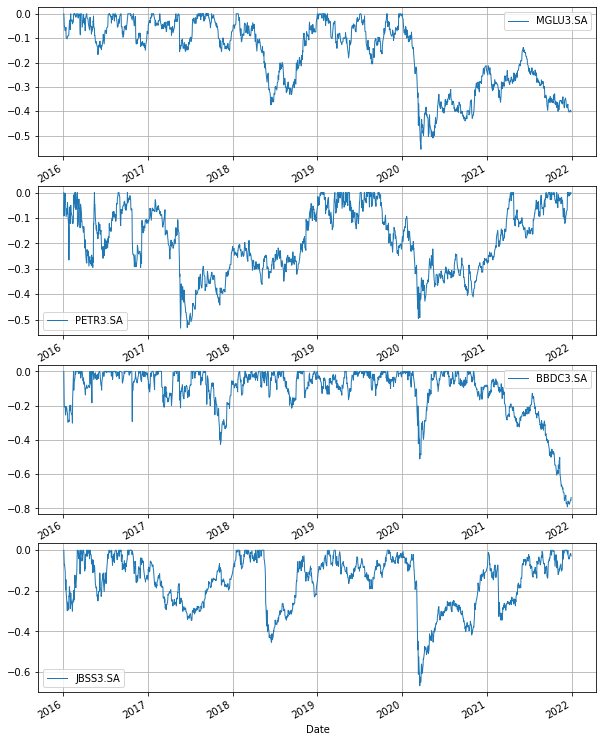

In [201]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,14))

for i in range(4):
    ticker = df.columns[i]
    df[ticker].plot(ax=axes[i], legend=ticker, grid=True, lw=1)